In [1]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import keras from tensorflow
import tensorflow as tf
from tensorflow import keras

In [3]:
# To read csv file
df = pd.read_csv("D:\DATA SCIENCE\deep learning\PRACTICE\customerchurn.csv.xls")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.drop('customerID',axis=1,inplace=True)

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
# to check type of all columns
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# To check all unique values in TotalCharges column
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
# To create a copy of df for new changes
df1 = df.copy()

In [17]:
# The to_numeric function used for convert all values into numeric type 
# coerce error used for if value not convert into numeric type then it convert into nan 
df1['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors='coerce')

In [18]:
#Checking for missing values 
df1.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        7043
Churn                  0
dtype: int64

In [21]:
# Replace null values into 0
df1 = df.fillna(0)

In [24]:
df1.shape

(7043, 20)

In [25]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0.0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0.0,No


In [26]:
# To find unique values in all columns
for i in df1:
       print(i,":",df1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [27]:
# To replace No phone service and No internet service with no
df1.replace('No phone service', "No", inplace=True)
df1.replace('No internet service', "No", inplace=True)

In [28]:
# To replace Yes=1, No=0
df1.replace({'Yes':1, "No":0,"Female":0,"Male":1},inplace=True)

In [29]:
for i in df1:
       print(i,":",df1[i].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [0.]
Churn : [0 1]


In [32]:
# using get dummies for "InternetService","Contract","PaymentMethod" this columns
final=pd.get_dummies(data=df1,columns = ["InternetService","Contract","PaymentMethod"],drop_first=True)

In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [35]:
# To check how many customers are  leaving
final[final['Churn']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0.0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,0.0,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,0.0,0,1,0,1,0,0,0,0
6,1,0,0,1,22,1,1,0,1,0,...,89.10,0.0,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,29.75,0.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,0,0,...,21.15,0.0,0,0,0,0,1,0,0,0
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,0.0,0,1,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,0.0,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,0.0,0,1,0,0,0,0,1,0


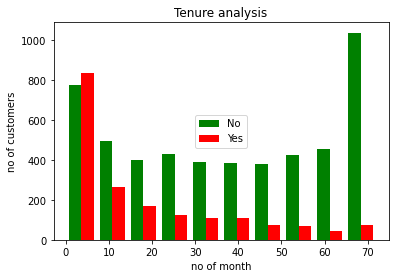

In [37]:
# To plot graph how many customers are  leaving or not
tenure0 = final[final['Churn']==0].tenure
tenure1 = final[final['Churn']==1].tenure

plt.hist([tenure0,tenure1],color = ['green','red'],label=['No','Yes'])
plt.xlabel('no of month')
plt.ylabel('no of customers')
plt.title("Tenure analysis")
plt.legend(loc ="center")
plt.show()

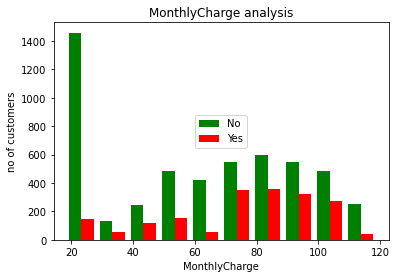

In [38]:
# To plot graph for analysis of MonthlyCharge 
MonthlyCharges0 = final[final['Churn']==0].MonthlyCharges
MonthlyCharges1 = final[final['Churn']==1].MonthlyCharges

plt.hist([MonthlyCharges0,MonthlyCharges1],color = ['green','red'],label=['No','Yes'])
plt.xlabel('MonthlyCharge')
plt.ylabel('no of customers')
plt.title("MonthlyCharge analysis")
plt.legend(loc ="center")
plt.show()

In [47]:
#Data preprocessing 
#separate the data and label
X = final.drop("Churn",axis = 1)
y = final.Churn

In [48]:
# Scaling of dataset
# fit_transform used on training data so that we can scale the training data and also learn the scaling parameters of that data.
  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [49]:
scaled.shape

(7043, 23)

In [50]:
#Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=42)

In [51]:
X_train.shape

(5634, 23)

In [52]:
X_test.shape

(1409, 23)

In [55]:
# create a model
model = keras.Sequential([
   
    keras.layers.Dense(1,input_shape = (23,),activation ="sigmoid")
    
])

model.compile(optimizer= 'adam',loss="binary_crossentropy" , metrics=['accuracy'])

model.fit(X_train , y_train , epochs = 200)

Epoch 1/200
177/177 [==============================] - 1s 2ms/step - loss: 0.5040 - accuracy: 0.7586
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7696
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7732
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7788
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7817
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7827
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7835
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7856
Epoch 9/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.7852
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4391 - accura

177/177 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8019
Epoch 82/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8000
Epoch 83/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8024
Epoch 84/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8014
Epoch 85/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8014
Epoch 86/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8024
Epoch 87/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8014
Epoch 88/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8005
Epoch 89/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8024
Epoch 90/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 

177/177 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7998
Epoch 161/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.7994
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8007
Epoch 163/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8014
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8007
Epoch 165/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7998
Epoch 166/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8005
Epoch 167/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8005
Epoch 168/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8001
Epoch 169/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4203 - a

In [54]:
# Add one more layer in model
model = keras.Sequential([
    keras.layers.Dense(50,input_shape = (23,),activation ="relu",kernel_initializer = 'ones' ,bias_initializer='zeros'),
    keras.layers.Dense(1,activation ="sigmoid")  
])
model.compile(optimizer= 'adam',loss="binary_crossentropy" , metrics=['accuracy'])
model.fit(X_train , y_train , epochs = 200)


Epoch 1/200
177/177 [==============================] - 1s 793us/step - loss: 0.8018 - accuracy: 0.7016
Epoch 2/200
177/177 [==============================] - 0s 774us/step - loss: 0.4578 - accuracy: 0.7820
Epoch 3/200
177/177 [==============================] - 0s 762us/step - loss: 0.4430 - accuracy: 0.7856
Epoch 4/200
177/177 [==============================] - 0s 752us/step - loss: 0.4341 - accuracy: 0.7898
Epoch 5/200
177/177 [==============================] - 0s 774us/step - loss: 0.4351 - accuracy: 0.7898
Epoch 6/200
177/177 [==============================] - 0s 765us/step - loss: 0.4320 - accuracy: 0.7934
Epoch 7/200
177/177 [==============================] - 0s 758us/step - loss: 0.4314 - accuracy: 0.7900
Epoch 8/200
177/177 [==============================] - 0s 766us/step - loss: 0.4281 - accuracy: 0.7975
Epoch 9/200
177/177 [==============================] - 0s 764us/step - loss: 0.4268 - accuracy: 0.7957
Epoch 10/200
177/177 [==============================] - 0s 776us/step - l

177/177 [==============================] - 0s 771us/step - loss: 0.4303 - accuracy: 0.7964
Epoch 80/200
177/177 [==============================] - 0s 769us/step - loss: 0.4218 - accuracy: 0.8007
Epoch 81/200
177/177 [==============================] - 0s 768us/step - loss: 0.4285 - accuracy: 0.7945
Epoch 82/200
177/177 [==============================] - 0s 780us/step - loss: 0.4306 - accuracy: 0.7930
Epoch 83/200
177/177 [==============================] - 0s 765us/step - loss: 0.4232 - accuracy: 0.8010
Epoch 84/200
177/177 [==============================] - 0s 768us/step - loss: 0.4265 - accuracy: 0.7984
Epoch 85/200
177/177 [==============================] - 0s 776us/step - loss: 0.4274 - accuracy: 0.7971
Epoch 86/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7987
Epoch 87/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.7994
Epoch 88/200
177/177 [==============================] - 0s 3ms/step - loss: 0.425

177/177 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.7975
Epoch 159/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4260 - accuracy: 0.7993
Epoch 160/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.7957
Epoch 161/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.7977
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8001
Epoch 163/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.7987
Epoch 164/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8017
Epoch 165/200
177/177 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8014
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7952
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4235 - a

In [56]:
# To check loss and accuracy using model.evaluate
model.evaluate(X_test , y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8169


[0.3996967673301697, 0.8168914318084717]

* To plot confusion matrix

In [57]:
predicted = model.predict(X_train)
predicted

177/177 [==============================] - 0s 2ms/step


array([[0.09318116],
       [0.12953685],
       [0.6229709 ],
       ...,
       [0.21470962],
       [0.8166622 ],
       [0.04523435]], dtype=float32)

In [58]:
y_prediction = []
for i in  predicted:
    if i < 0.5:
        y_prediction.append(0)
    else:
        y_prediction.append(1)

In [59]:
cm = tf.math.confusion_matrix(labels= y_train,predictions =y_prediction)

<AxesSubplot:>

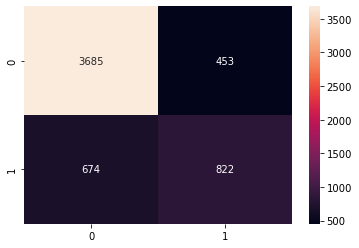

In [60]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt = "d")

In [66]:
# To count values in Churn column how many 0 & 1
final["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [67]:
# Shape of df0
df0=final[final['Churn']==0]
df0.shape

(5174, 24)

In [72]:
# Shape of df1
df1=final[final['Churn']==1]
df1.shape

(1869, 24)

In [73]:
# i want random 1869samples from df0
df0_undersample = df0.sample(1869)
df0_undersample.shape

(1869, 24)

In [74]:
# To concat df1 and df0_undersample
undersample = pd.concat([df1,df0_undersample])

In [75]:
# shape of undersample
undersample.shape

(3738, 24)

In [76]:
# To scale tenure,MonthlyCharges,TotalCharges this three columns
col_scale = undersample[['tenure','MonthlyCharges','TotalCharges']]

In [80]:
undersample[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(col_scale)

In [81]:
# train test split
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(undersample.drop("Churn",axis = 1), undersample.Churn, test_size=0.20, random_state=42)

In [82]:
# create a model
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1,input_shape = (23,),activation ="sigmoid")
#     keras.layers.Dense(1,activation ="sigmoid")  
])
model.compile(optimizer= 'adam',loss="binary_crossentropy" , metrics=['accuracy'])
model.fit(X_train_min , y_train_min , epochs = 100)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.7921 - accuracy: 0.4381
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.5033
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5605
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6067
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6472
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6759
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6983
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7134
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7244
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7338
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7696
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7689
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7702
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7719
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7722
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7706
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7712
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7709
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7706
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7706
Epoch 93/100


In [86]:
# To check loss and accuracy using model.evaluate
model.evaluate(X_test_min , y_test_min)
predicted = model.predict(X_train_min)

94/94 [==============================] - 0s 2ms/step


In [87]:
y_prediction = []
for i in  predicted:
    if i < 0.5:
        y_prediction.append(0)
    else:
        y_prediction.append(1)

<AxesSubplot:>

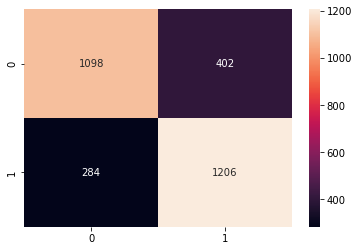

In [88]:
cm = tf.math.confusion_matrix(labels= y_train_min,predictions =y_prediction )
import seaborn as sns
sns.heatmap(cm,annot=True,fmt = "d")